Enter the calculator you want to use(EMI /Loan Eligibility): Emi

Enter the loan amount: 5000000

Is there a downpayment done in loan(yes/no)? yes
Downpayement as a percentage of p(in %): 20
Enter type of loan(home loan/car loan/personal loan): home
Enter the loan tenure(in years): 20

Monthly EMI =  31624.0

Interest Paymnet =  3589760.0
Total Payment(Pricipal + Interest) =  7589760.0
Down Payment =  1000000.0


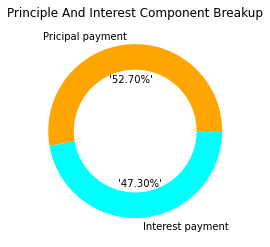

,Year,Principle,Interest,Total(P + I)
0,2022.0,61128.0,223488.0,284616.0
1,2023.0,87024.0,292464.0,379488.0
2,2024.0,93780.0,285708.0,379488.0
3,2025.0,101060.0,278428.0,379488.0
4,2026.0,108905.0,270583.0,379488.0
5,2027.0,117360.0,262128.0,379488.0
6,2028.0,126471.0,253017.0,379488.0
7,2029.0,136289.0,243199.0,379488.0
8,2030.0,146870.0,232618.0,379488.0
9,2031.0,158272.0,221216.0,379488.0


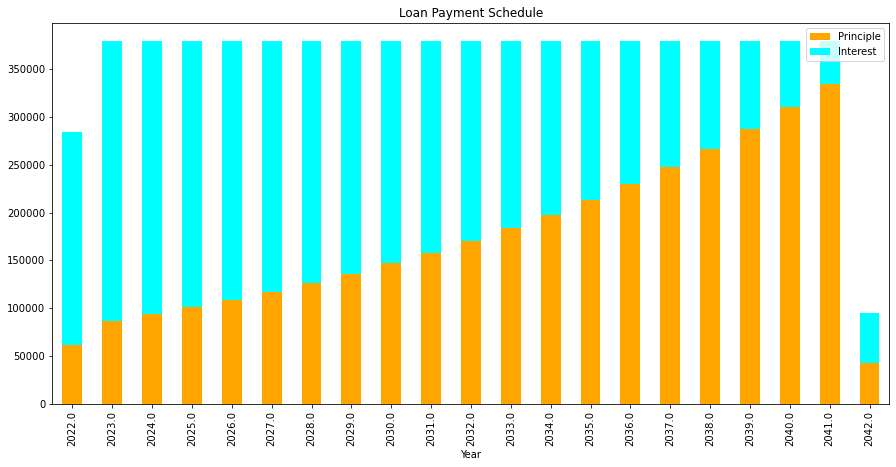

In [2]:
#importing the required libraries
from datetime import date
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
while True:
    try:   #to avoid error in worng input 
        select_cal=input('Enter the calculator you want to use(EMI /Loan Eligibility): ')

        if select_cal.upper()=='EMI': #the first calculator calculates emi for loan amount
            p=int(input('\nEnter the loan amount: '))

            input_downpayment=input('\nIs there a downpayment done in loan(yes/no)? ')

            if input_downpayment.lower()=='yes':
                p_down_per= input('Downpayement as a percentage of p(in %): ')
                p_down=(p*int(p_down_per)/100)
            elif input_downpayment.lower()=='no':
                p_down=0
            else: 
                print('There is some wrong entry please re-enter the values')
                continue
            p=p-p_down # principal amount is reduced as per down payment done
            principle=p
            
            while True:   #different loans are given different rate of interest as default
                loan_type=input('Enter type of loan(home loan/car loan/personal loan): ')
                if loan_type.lower()=='home loan' or loan_type.lower()=='home' :
                    r=0.075
                    break
                elif loan_type.lower()=='personal loan' or loan_type.lower()=='personal':
                    r=0.11
                    break
                elif loan_type.lower()=='car loan' or loan_type.lower()=='car':
                    r=0.085
                    break
                else:
                    print('invalid entry')
            n=12    #monthly compounding is considered
            t=int(input('Enter the loan tenure(in years): '))

            r_eff=((1+r)**(1/12))-1

            emi = p* r_eff * ((r_eff+1)**(t*n))/((r_eff+1)**(t*n)-1)  #calculating emi pased on principle, rate, tensure 
            emi=round(emi,0)
            print('\nMonthly EMI = ',round(emi,0))
            break

        elif select_cal.upper()=='LOAN ELIGIBILITY': #second calculator is for checking loan eligibility on the basis of emi he can pay
            emi=int(input('Enter the EMI amount which user is willing to pay: '))
            while True:
                loan_type=input('\nEnter type of loan(home loan/car loan/personal loan): ')
                if loan_type.lower()=='home loan' or loan_type.lower()=='home' :
                    r=0.075
                    break
                elif loan_type.lower()=='personal loan' or loan_type.lower()=='personal':
                    r=0.11
                    break
                elif loan_type.lower()=='car loan' or loan_type.lower()=='car':
                    r=0.085
                    break
                else:
                    print('invalid entry')
            n=12 
            t=int(input('Enter the loan tenure(in years): '))
            r_eff=((1+r)**(1/12))-1
            p_down=0
            p = emi/ ((r_eff) * (r_eff+1)**((t*n))/((r_eff+1)**(t*n)-1))
            p=round(p,0)
            print('\nAmount of loan for which user is eligle = ',p)
            break
        else:
            print('invalid entry')
    except:
        print('There is some wrong entry please re-enter the values')
        continue

interest_payment=round(emi*12*t-p,0)
print('\nInterest Paymnet = ',interest_payment)

total_payment=round(emi*12*t,0)
principal_payment=total_payment-interest_payment

print('Total Payment(Pricipal + Interest) = ',total_payment)

if select_cal.upper()=='EMI':
    print('Down Payment = ',p_down)

y = np.array([principal_payment,interest_payment]) # making a donut chart for priciple and interest amount
mylabels = ["Pricipal payment", "Interest payment"]
mycolors = ["orange",'cyan']
plt.title('Principle And Interest Component Breakup')
plt.pie(y,labels=mylabels,colors=mycolors,autopct="'%1.2f%%'")
circle = plt.Circle( (0,0), 0.7, color='white')
pi=plt.gcf()
pi.gca().add_artist(circle)
plt.show()

interest_component=0 #for the first finanacial year
interest_annual=[]
for i in range(1,14-date.today().month):
    int1=r/n*p
    p=p-(emi-int1)
    interest_component+=int1
interest_annual.append(round(interest_component,0))
for j in range(t-1):
    interest_component=0
    for k in range(n):
        int1=r/n*p
        p=p-(emi-int1)
        interest_component+=int1
    interest_annual.append(round(interest_component,0))
for k in range(1,date.today().month):
        int1=r/n*p
        p=p-(emi-int1)
        interest_component+=int1
interest_annual.append(round(interest_component,0))

y=[]
z=[]
p1=[]
for i in range(len(interest_annual)): #creating a amortization table 
    if i==0:
        p1.append(emi*(13-date.today().month)-interest_annual[i])
    elif i==t:
        p1.append(emi*(date.today().month-1)-interest_annual[i])
    else:
        p1.append(emi*(12)-interest_annual[i])
    x=p1[i]+interest_annual[i]
    y.append(x)
    year=(date.today().year)+i
    z.append(year)
df = pd.DataFrame([z,p1,interest_annual,y]).transpose()
df.columns = ['Year','Principle','Interest','Total(P + I)']
display(df)
df[['Year','Principle','Interest']].plot.bar(x='Year',stacked=True,figsize=(15,7),
                                             title='Loan Payment Schedule', color=("orange", "cyan"))
plt.show()